In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_image(img):
    assert img.dtype == np.uint8
    assert len(img.shape) == 2 or (len(img.shape) == 3 and img.shape[2] == 3)
    
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        assert len(img.shape) == 3 and img.shape[2] == 3
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [3]:
def read_image(path, is_grayscale=False):

    img = cv.imread(path, cv.IMREAD_GRAYSCALE if is_grayscale else cv.IMREAD_COLOR)
    assert img is not None, f"Failed to read image from {path}"
    return img

(640, 800)


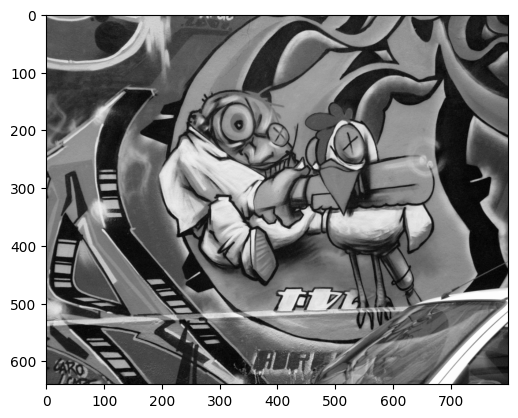

In [4]:
img = read_image('img1.png', is_grayscale=True)

print(img.shape)
show_image(img)

In [5]:
# Birazcik basit tutmak icin asagidaki fonksiyonlarda img'nin grayscale oldugunu varsayabilirsin.

In [6]:
def translate_image(img, tx, ty):
    pass  # tx ve ty tamsayidir (negatif olabilirler). Bos kalan yerleri siyaha boya. Imge cozunurlugu ayni kalsin.

    # x column oluyor, y ise row!!!

In [7]:
def upscale_image(img, s):
    pass  # s (scale factor) pozitif bir tamsayi. Nearest neighbor yontemini kullanarak imgeyi buyut.
    # Yani ayni degerlerden yan yana ve alt alta tekrar tekrar yazilacak.

In [8]:
# Isinma hareketleri bitti. Bu parametreler illa tamsayi olmak zorunda degil. Asagidaki islemlerde kullanilabilecek bir fonksiyon yazalim.

def interpolate(img, x, y, is_bilinear=True):
    pass  # x ve y tamsayi ise img'nin o koordinatlarini dondur. tamsayi degilse interpolasyon yaparak tahmini degeri dondur.
    # Imge disindaki yerleri siyah olarak dondur.
    # is_bilinear False ise nearest neighbor yontemini kullan.

    # y row
    # x col
    
    def is_int(a):
        return a == int(a)

    assert isinstance(img, np.ndarray)
    assert img.dtype == np.uint8
    assert img.ndim == 2

    assert isinstance(x, (int, float))
    assert isinstance(y, (int, float))

    assert isinstance(is_bilinear, bool)

    h, w = img.shape
    if x < 0 or x >= w or y < 0 or y >= h:
        return 0
    
    if is_int(x) and is_int(y):
        return img[int(y), int(x)]
    
    if is_bilinear:
        x1, x2 = int(x), int(x) + 1
        y1, y2 = int(y), int(y) + 1

        if x2 >= w:
            x2 = x1
        if y2 >= h:
            y2 = y1

        f11 = img[y1, x1]
        f21 = img[y1, x2]
        f12 = img[y2, x1]
        f22 = img[y2, x2]


        result = (f11 * (x2 - x) * (y2 - y) +
                f21 * (x - x1) * (y2 - y) +
                f12 * (x2 - x) * (y - y1) +
                f22 * (x - x1) * (y - y1)) / ((x2 - x1) * (y2 - y1) + 1e-6)
        
        result = round(result)
        assert 0 <= result <= 255, f"result is {result}"

        return result

    else:
        return img[round(y), round(x)]
    

In [9]:
# Asagidaki fonksiyonlarda hep resolution sabit tut.

# Eger homogeneous coordinates kullanirsan isin kolaylasir.
# Mesela: https://www.javatpoint.com/computer-graphics-homogeneous-coordinates
# veya: https://www.geeksforgeeks.org/computer-graphics-homogeneous-coordinates

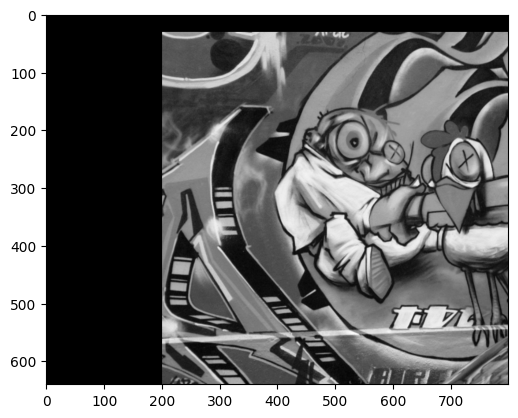

In [10]:
def translate(img, tx, ty, is_bilinear=True):
    pass  # interpolate fonksiyonunu cagirarak yeni imgeyi olustur.
    # Ornegin imge 300x400'luk ise 120000 defa tamsayi koordinatlar icin o koordinat (y, x) olsun, 
    # oraya (y-ty, x-tx) koordinatlarinda ne oldugu tahmin ediliyorsa onu yazacaksin. 
    # (Cikarma yapiyoruz cunku mesela tx kaydirmak demek x'e x-tx'teki degeri yazmak demek.)

    # Grayscale dusunelim.

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            y = row_no - ty
            x = col_no - tx
            new_img[row_no, col_no] = interpolate(img, x, y, is_bilinear=is_bilinear)
    return new_img


translated_img = translate(img, 200.25, 30.5, is_bilinear=True)
show_image(translated_img)

(640, 800) (640, 800)
uint8 uint8

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 114 117 113]
 [  0   0   0 ... 111 107 104]
 [  0   0   0 ... 102  96  95]]

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 114 117 113]
 [  0   0   0 ... 111 107 104]
 [  0   0   0 ... 103  96  96]]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
167.0
0.25361913


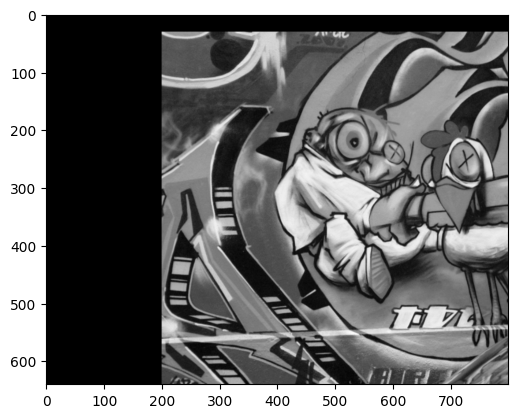

In [11]:
tx = 200.25
ty = 30.5
M = np.float32([[1, 0, tx], [0, 1, ty]])

translated_img_opencv = cv.warpAffine(img, M, (img.shape[1], img.shape[0]), cv.INTER_LINEAR)
show_image(translated_img_opencv)

print(translated_img.shape, translated_img_opencv.shape)
print(translated_img.dtype, translated_img_opencv.dtype)
print()
print(translated_img)
print()
print(translated_img_opencv)
print()

diff = np.abs(translated_img.astype(np.float32) - translated_img_opencv.astype(np.float32))
print(diff)
print(np.max(diff))
print(np.mean(diff))




In [12]:
print(len(diff[diff > 100]))

229


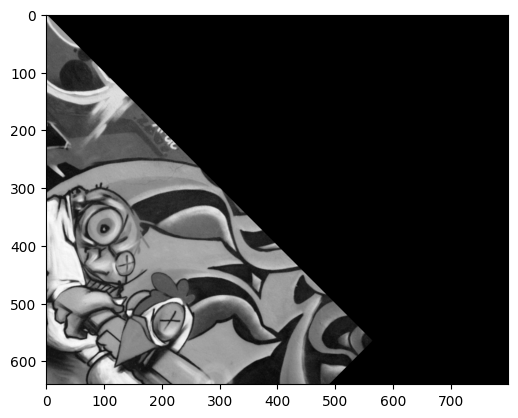

In [13]:
# rotate ...
# Saat yonunde olsun. Radyan cinsinden aci alalim. (0, 0) koordinatlari etrafinda dondurme yapalim.

def rotate(img, theta, is_bilinear=True):
    # We have  interpolate(img, x, y, is_bilinear=True)

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            y = row_no * np.cos(theta) + col_no * np.sin(theta)
            x = -row_no * np.sin(theta) + col_no * np.cos(theta)
            new_img[row_no, col_no] = interpolate(img, x, y, is_bilinear=is_bilinear)
    return new_img


rotated_img = rotate(img, -np.pi/4, is_bilinear=True)
show_image(rotated_img)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]


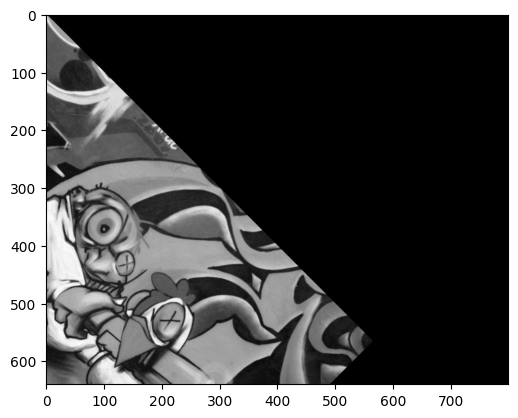

In [14]:
import math

theta = -np.pi/4

M = cv.getRotationMatrix2D((0, 0), math.degrees(theta), 1)  # Center is (0,0) -- You can rotate around center point of the image as well. Scale is 1. Takes degrees!
print(M)
show_image(cv.warpAffine(img, M, (img.shape[1], img.shape[0])))

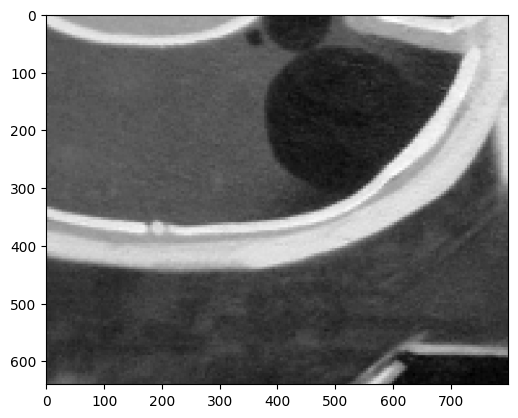

In [15]:
# scale ...
# Pozitif bir scale factor alacaksin ama 1'den kucuk olabilir yani kucultme islemi olabilir.

def scale(img, s, is_bilinear=True):
    # We have  interpolate(img, x, y, is_bilinear=True)

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            y = row_no / s
            x = col_no / s
            new_img[row_no, col_no] = interpolate(img, x, y, is_bilinear=is_bilinear)
    return new_img


scaled_img = scale(img, 4.5, is_bilinear=False)
show_image(scaled_img)

[[ 4.5  0.  -0. ]
 [-0.   4.5  0. ]]


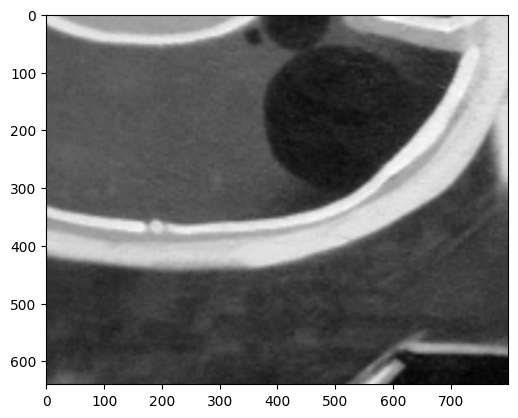

In [16]:
M = cv.getRotationMatrix2D((0, 0), 0, 4.5)
print(M)
show_image(cv.warpAffine(img, M, (img.shape[1], img.shape[0])))

In [17]:
def apply_euclidean_transform(img, tx, ty, theta, is_bilinear=True):
    # We have  interpolate(img, x, y, is_bilinear=True)

    # Alternatively get 2x3 matrix:
    # r11 r12 tx
    # r21 r22 ty
    # But DoF is only 3.

    # Alternatively get 3x3 matrix:
    # r11 r12 tx
    # r21 r22 ty
    # 0   0   1
    # But DoF is only 3.

    # Note:
    # r11 = cos(theta)
    # r12 = -sin(theta)
    # r21 = sin(theta)
    # r22 = cos(theta)

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            y = ...
            x = ...
            new_img[row_no, col_no] = interpolate(img, x, y, is_bilinear=is_bilinear)
    return new_img

In [18]:
# apply_similarity_transform
# Usttekilerin hepsini birden uygulayacaksin. Ayrintilari arastirabilirsin.

def apply_similarity_transform(img, tx, ty, theta, s, is_bilinear=True):
    # We have  interpolate(img, x, y, is_bilinear=True)

    # Alternatively get 2x3 matrix:
    # sr11 sr12 tx
    # sr21 sr22 ty
    # But DoF is only 4.

    # Alternatively get 3x3 matrix:
    # sr11 sr12 tx
    # sr21 sr22 ty
    # 0    0    1
    # But DoF is only 4.

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            y = ...
            x = ...
            new_img[row_no, col_no] = interpolate(img, x, y, is_bilinear=is_bilinear)
    return new_img

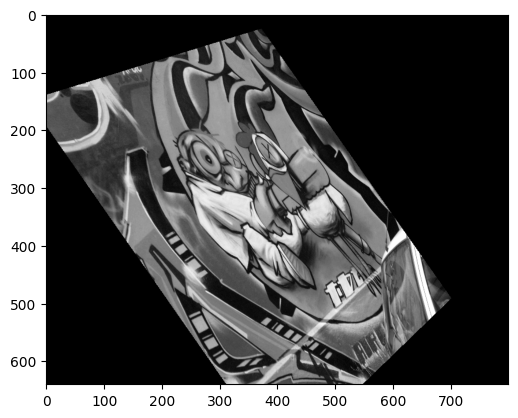

In [19]:
# Opsiyonel

# Aslinca apply_affine_transform ve apply_projective_transform da cok benzer ve basit.
# Affine icin 6 tane deger aliyorsun (2x3 matris seklinde aliyorsun, altina 0 0 1 koyuyorsun), 
# Projective icin (homography diye geciyor) 8 tane deger aliyorsun (3x3 matris seklinde aliyorsun, sag alt degeri 1).
# Mesela: https://www.cs.cornell.edu/courses/cs5670/2019sp/lectures/lec07_transformations.pdf

def apply_affine_transform(img, A, is_bilinear=True):

    # Alternatively get 3x3 matrix:
    # a11 a12 a13
    # a21 a22 a23
    # 0   0   1

    pass


def apply_projective_transform(img, H, is_bilinear=True):

    pass

    def to_homogeneous(pt):
        return np.array([pt[0], pt[1], 1])
    
    def from_homogeneous(pt):
        return np.array([pt[0]/pt[2], pt[1]/pt[2]])

    H = np.linalg.inv(H)  # Cunku tersten bakiyoruz. Orada ne vardi diye bakiyoruz.

    new_img = np.zeros_like(img)
    for row_no in range(img.shape[0]):
        for col_no in range(img.shape[1]):
            pt = from_homogeneous(np.dot(H, to_homogeneous(np.array([col_no, row_no]))))
            new_img[row_no, col_no] = interpolate(img, pt[0], pt[1], is_bilinear=is_bilinear)
    return new_img


#H = np.array([[0.6, 0.04, 5.5],
#              [-0.11, 0.5, 85.7],
#              [0.0001, 0.0001, 1]])

H = np.loadtxt('H1to4p')

projected_img = apply_projective_transform(img, H, is_bilinear=True)
show_image(projected_img)


# apply_projective_transform implement edilirse apply_affine_transform, apply_similarity_transform, apply_euclidean_transform, translate, rotate, scale bunun cinsinden kolayca yazilir.
# Bu sekildeki butun iliskileri yaziyorum:
# apply_projective_transform:   apply_affine_transform, apply_similarity_transform, apply_euclidean_transform, translate, rotate, scale
# apply_affine_transform:       apply_similarity_transform, apply_euclidean_transform, translate, rotate, scale
# apply_similarity_transform:   apply_euclidean_transform, translate, rotate, scale
# apply_euclidean_transform:    translate, rotate  (scale yok!)

# Mesela apply_affine_transform'da A alip sonuna 0 0 1 ekleyip H'yi buluyorsun, sonra apply_projective_transform'a H'yi veriyorsun.

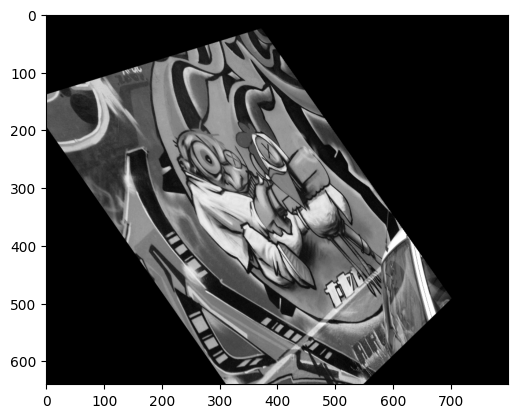

In [20]:
show_image(cv.warpPerspective(img, H, (img.shape[1], img.shape[0])))

In [21]:
# Opsiyonel

# create_translation_matrix(tx, ty)
# create_rotation_matrix(theta)
# create_scaling_matrix(s)
# Fonksiyonlarini tanimla. Bunlar 3x3'luk matrisler dondursun.
# apply_projective_transform ile bunlarin beraber kullanimlari translate, rotate, scale fonksiyonlarinin yerlerini tutabilsin.
# Ornegin translate(img, tx, ty) yerine apply_projective_transform(img, create_translation_matrix(tx, ty)) kullanilabilsin.

# Ne ise yarayacak? 
# Donusumleri matris seklinde ifade edince hem matrisleri carparak birden fazla donusumu ifade edebiliyorum (matris carpimi)
# hem de terslerini de hesaplayabiliyorum (matris tersi).
# Ornegin sadece translate fonksiyonunu kullanarak once yukari 20 px kaydirma yapip sonra asagi 20 px kaydirma yaparsak
# imge eski haline gelmez! Cunku bazi bilgiler yukari kaydirma isleminde kaybolur.
# Ama matrislerle ifade edince bu sorun ortadan kalkmis olur. 
# Yani translate(translate(img, 0, 20), 0, -20) beklenen sonucu vermezken
# apply_projective_transform(img, create_translation_matrix(0, 20) @ create_translation_matrix(0, -20)) beklenen sonucu verir (orijinal imgeyi).
# Tabii zaten boyle bir islem cok da mantikli degil. Ama su mantikli:
# Imgeyi ortadan dondurmek mevcut fonksiyonlarla imkansiz. (Cunku mesela once dondurup sonra kaydirsak bazi pikseller kaybolmus olur.)
# Ama artik apply_projective_transform(img, create_translation_matrix(-img.shape[1]/2, -img.shape[0]/2) @ create_rotation_matrix(angle) @ create_translation_matrix(img.shape[1]/2, img.shape[0]/2))
# ile imgeyi ortadan dondurebiliriz. (Genel olarak A @ B @ C @ point aslinda A(B(C(point))) bileske fonksiyonu gibi calisiyor. Yani en son A uygulanir.)
# Benzer sekilde elimdeki herhangi bir transformation matrix'in etkisini tersine cevirmek istersem np.linalg.inv() fonksiyonunu kullanabilirim.
